# Feature Engineering
In this notebook we will create new features from the existing features in the dataset, before moving onto encoding numerical and categorical features.

In [1275]:
# Imports
import pandas as pd
import numpy as np
import scipy.stats as ss
import scipy.special as ss2
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', None)

In [1276]:
# Loading house price train dataset
df_train = pd.read_csv(r'../data/formatted_data/train_clean.csv', index_col=0, keep_default_na=False, na_values="")
df_test = pd.read_csv(r'../data/formatted_data/test_clean.csv', index_col=0, keep_default_na=False, na_values="")
print(df_train.shape)
print(df_test.shape)
train_len = len(df_train)
df = pd.concat([df_train, df_test], ignore_index=True)
print(df.shape)
df.head()

(1458, 80)
(1459, 80)
(2917, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0


In [1277]:
# Checking datatypes
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [1278]:
# Checking numerical features
df.select_dtypes(['int64', 'float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1279]:
# Checking categorical features
df.select_dtypes('O').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

There are numerical features (MSSubClass, MoSold, YrSold) that should be converted to categorical data. For now we will convert just MSSubClass and MoSold. YrSold will be used to create new numerical features such as the age of the property and will be left as numeric for now. Due to YrSold only covering from 2006-2010 we will convert it to a categorical feature and encode it later on.

In [1280]:
# Converting to the correct datatype
df[['MSSubClass', 'MoSold']] = df[['MSSubClass', 'MoSold']].astype('O')

In [1281]:
# Confirming that there are no missing values other than SalePrice
missing_data = df.isna().sum()
missing_data[missing_data>0]

SalePrice    1459
dtype: int64

## New Feature Engineering
To begin with we will perform feature engineering to produce new features in the hope that they will be highly correlated with the target. Lets begin by creating new numerical features from the existing numerical features in the dataset, these will include:
* Age of property
* Years since remod
* Total property square footage
* Total number of bathrooms
* Total porch square footage

Not for the total number of bathrooms, half bathrooms will be counted as 0.5.

In [1282]:
# Checking if TotalBsmtSF is the sum of the individual Basement SF's
len(df[df['BsmtFinSF1']+df['BsmtFinSF2']+df['BsmtUnfSF'] == df['TotalBsmtSF']])

2917

In [1283]:
# Checking whether GrLivArea is the sum of 1stFlrSF, 2ndFlrSF and LowQualFinSF
len(df[df['1stFlrSF']+df['2ndFlrSF']+df['LowQualFinSF'] == df['GrLivArea']])

2917

In [1284]:
# Checking if there are more than one porch type on a property
porch_cols = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
has_two_or_more_porch = (df[porch_cols] > 0).sum(axis=1) >= 2
len(df[has_two_or_more_porch])

1214

In [1285]:
# Creating new numerical features
df['Age'] = df.apply(lambda x: (x['YrSold'] - x['YearBuilt']) if (x['YrSold'] - x['YearBuilt'] > -1) else 0, axis=1)
df['YrsSinceRemod'] = df.apply(lambda x: (x['YrSold'] - x['YearRemodAdd']) if (x['YrSold'] - x['YearRemodAdd'] > -1) else 0, axis=1)
df['TotalSF'] = df['TotalBsmtSF'] + df['GrLivArea']
df['TotalBthrms'] = df['BsmtFullBath'] + (0.5*df['BsmtHalfBath']) + df['FullBath'] + (0.5*df['HalfBath'])
df['TotalPorchSF'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

Lets also create binary features for whether a property contains a certain feature or not (e.g. basement, pool etc). These features will be:
* Basement
* 2nd Floor
* Fireplace
* Garage
* Porch
* Pool
* Fence
* Is remodelled?

Lets also convert Central Air to a binary 1/0 instead of Yes/No.

In [1286]:
# Creating binary features for whether a propert contains a certain feature or not
df['Has_Bsmt'] = df['BsmtQual'].apply(lambda x: 0 if x=='NA' else 1)
df['Has_2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 0 if x==0 else 1)
df['Has_Fireplace'] = df['Fireplaces'].apply(lambda x: 0 if x==0 else 1)
df['Has_Garage'] = df['GarageType'].apply(lambda x: 0 if x=='NA' else 1)
df['Has_Porch'] = df['TotalPorchSF'].apply(lambda x: 0 if x==0 else 1)
df['Has_Pool'] = df['PoolArea'].apply(lambda x: 0 if x==0 else 1)
df['Has_Fence'] = df['Fence'].apply(lambda x: 0 if x=='NA' else 1)
df['Is_Remod'] = df.apply(lambda x: 0 if x['YearBuilt']==x['YearRemodAdd'] else 1, axis=1)

In [1287]:
df.shape

(2917, 93)

Next we will encode categorical features and transform/scale numerical features. During the exploratory analysis stage it was observed that many of the numerical features do not follow a normal distribution. This will effect some regression models and so we will transform and scale them. However, for some models such as tree-based models, non-normal distribution or scale does not matter, so we will also produce a dataset without these methods applied to the numerical features

In [1288]:
# Casting YrSold to object datatype
df['YrSold'] = df['YrSold'].astype('O')

# Obtaining numerical and categorical feature columns
cat_feats = df.select_dtypes('O').columns
num_feats = df.select_dtypes(['int64', 'float64']).columns

## Categorical Feature Engineering
In this section we will focus on encoding both the ordinal and nominal features in the dataset.

In [1289]:
# Displaying the categorical features for reference
cat_feats

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Ordinal Features
Many of the ordinal features share the same ordinality so we will deal with these first.

In [1290]:
# The ordinal features in the dataset
ordinal_feat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
                'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

In [1291]:
# Encoding ordinal features with shared ordinality
map = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for feat in ordinal_feat:
    df[feat] = df[feat].map(map)

Now we will encode the remaining ordinal features.

<AxesSubplot: xlabel='Street', ylabel='SalePrice'>

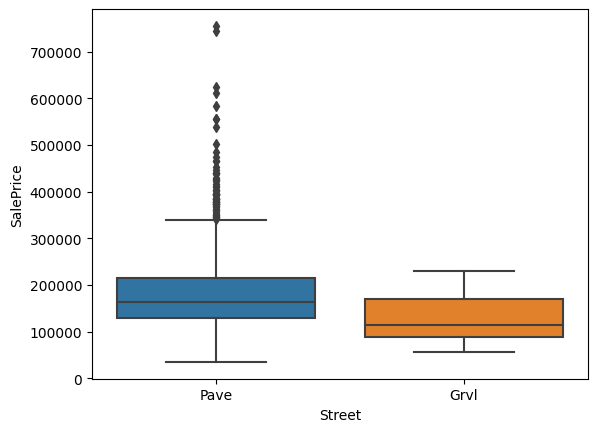

In [1292]:
sns.boxplot(df, x='Street', y='SalePrice')

In [1293]:
# Encoding Street
df['Street'] = df['Street'].map({'Grvl':0, 'Pave':1})

In [1294]:
# Encoding Utilities
map = {'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3}
df['Utilities'] = df['Utilities'].map(map)

In [1295]:
# Encoding BsmtExposure
map = {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
df['BsmtExposure'] = df['BsmtExposure'].map(map)

In [1296]:
# Encoding BsmtFinType1 and BsmtFinType2
map = {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
cols = ['BsmtFinType1', 'BsmtFinType2']
for col in cols:
    df[col] = df[col].map(map)

In [1297]:
# Encoding CentralAir
df['CentralAir'] = df['CentralAir'].map({'N':0, 'Y':1})

In [1298]:
# Encoding Functional
map = {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
df['Functional'] = df['Functional'].map(map)

In [1299]:
# Encoding GarageFinish
map = {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}
df['GarageFinish'] = df['GarageFinish'].map(map)

In [1300]:
# Encoding PavedDrive
map = {'N':0, 'P':1, 'Y':2}
df['PavedDrive'] = df['PavedDrive'].map(map)

In [1301]:
#Encoding Fence
map = {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}
df['Fence'] = df['Fence'].map(map)

In [1302]:
# Adding all the other ordinal features to a list and joining with initial ordinal list
ordinal_feat2 = ['Street', 'Utilities', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir',
             'Functional', 'GarageFinish', 'PavedDrive', 'Fence']
ordinal_feat = ordinal_feat + ordinal_feat2
ordinal_feat

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Street',
 'Utilities',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'CentralAir',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'Fence']

### Nominal Features
We will now one-hot encode the remaining nominal features.


In [1303]:
# Obtaining nominal features
nominal_feat = list(set(cat_feats).difference(set(ordinal_feat)))
nominal_feat

['YrSold',
 'RoofStyle',
 'MasVnrType',
 'Alley',
 'SaleCondition',
 'Foundation',
 'GarageType',
 'Condition1',
 'MSSubClass',
 'LandSlope',
 'MSZoning',
 'Neighborhood',
 'Heating',
 'Condition2',
 'RoofMatl',
 'MoSold',
 'LotConfig',
 'MiscFeature',
 'Electrical',
 'BldgType',
 'LotShape',
 'SaleType',
 'Exterior1st',
 'LandContour',
 'Exterior2nd',
 'HouseStyle']

In [1304]:
# One hot encoding the nominal features
df = pd.get_dummies(df, columns=nominal_feat)

C:\Users\RyanHancox\AppData\Local\Temp\ipykernel_23212\2480577723.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=nominal_feat)


In [1305]:
df.shape

(2917, 271)

In [1306]:
# Splitting the dataframe back into train and test sets
df_train = df.loc[0:train_len-1]
df_test = df.loc[train_len:].reset_index(drop=True)

# Saving the dataset in its current form (non-transformed or scaled numerics)
df_train.to_csv(r'../data/formatted_data/fe/train_fe_cat.csv')
df_test.to_csv(r'../data/formatted_data/fe/test_fe_cat.csv')

## Numerical Feature Engineering
Next we will focus on tranforming/scaling the numerical data in the dataset.

In [1307]:
# Removing Street and CentralAir from ordinal features list as they are binary
remove = ('Street', 'CentralAir')
ordinal_feat = [feat for feat in ordinal_feat if feat not in remove]
ordinal_feat

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Utilities',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'Fence']

In [1308]:
# Adding the ordinal encoded features to the numerical feature list
num_feats = num_feats.tolist()
num_feats.extend(ordinal_feat)

# Dropping the SalePrice target so we can just focus on features for now
num_feats.remove('SalePrice')
num_feats

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'Age',
 'YrsSinceRemod',
 'TotalSF',
 'TotalBthrms',
 'TotalPorchSF',
 'Has_Bsmt',
 'Has_2ndFlr',
 'Has_Fireplace',
 'Has_Garage',
 'Has_Porch',
 'Has_Pool',
 'Has_Fence',
 'Is_Remod',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Utilities',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'Fence']

In [1309]:
df[num_feats].nunique()

LotFrontage       133
LotArea          1949
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
MasVnrArea        442
BsmtFinSF1        989
BsmtFinSF2        272
BsmtUnfSF        1135
TotalBsmtSF      1056
1stFlrSF         1081
2ndFlrSF          633
LowQualFinSF       36
GrLivArea        1290
BsmtFullBath        4
BsmtHalfBath        3
FullBath            5
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       14
Fireplaces          5
GarageYrBlt       110
GarageCars          6
GarageArea        602
WoodDeckSF        379
OpenPorchSF       250
EnclosedPorch     183
3SsnPorch          31
ScreenPorch       121
PoolArea           13
MiscVal            38
Age               127
YrsSinceRemod      61
TotalSF          1499
TotalBthrms        11
TotalPorchSF      534
Has_Bsmt            2
Has_2ndFlr          2
Has_Fireplace       2
Has_Garage          2
Has_Porch           2
Has_Pool            2
Has_Fence           2
Is_Remod  

Since some of the numeric features are discrete with a low scale and range, with clear defined order, I am not going to transform or scale them. Any features with more than 10 unique values I will transform and scale.

In [1310]:
# Obtaining numeric feature names with more than 10 unique values
trans_feats = df[num_feats].nunique()[df[num_feats].nunique() > 10].index
trans_feats

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'Age', 'YrsSinceRemod', 'TotalSF',
       'TotalBthrms', 'TotalPorchSF'],
      dtype='object')

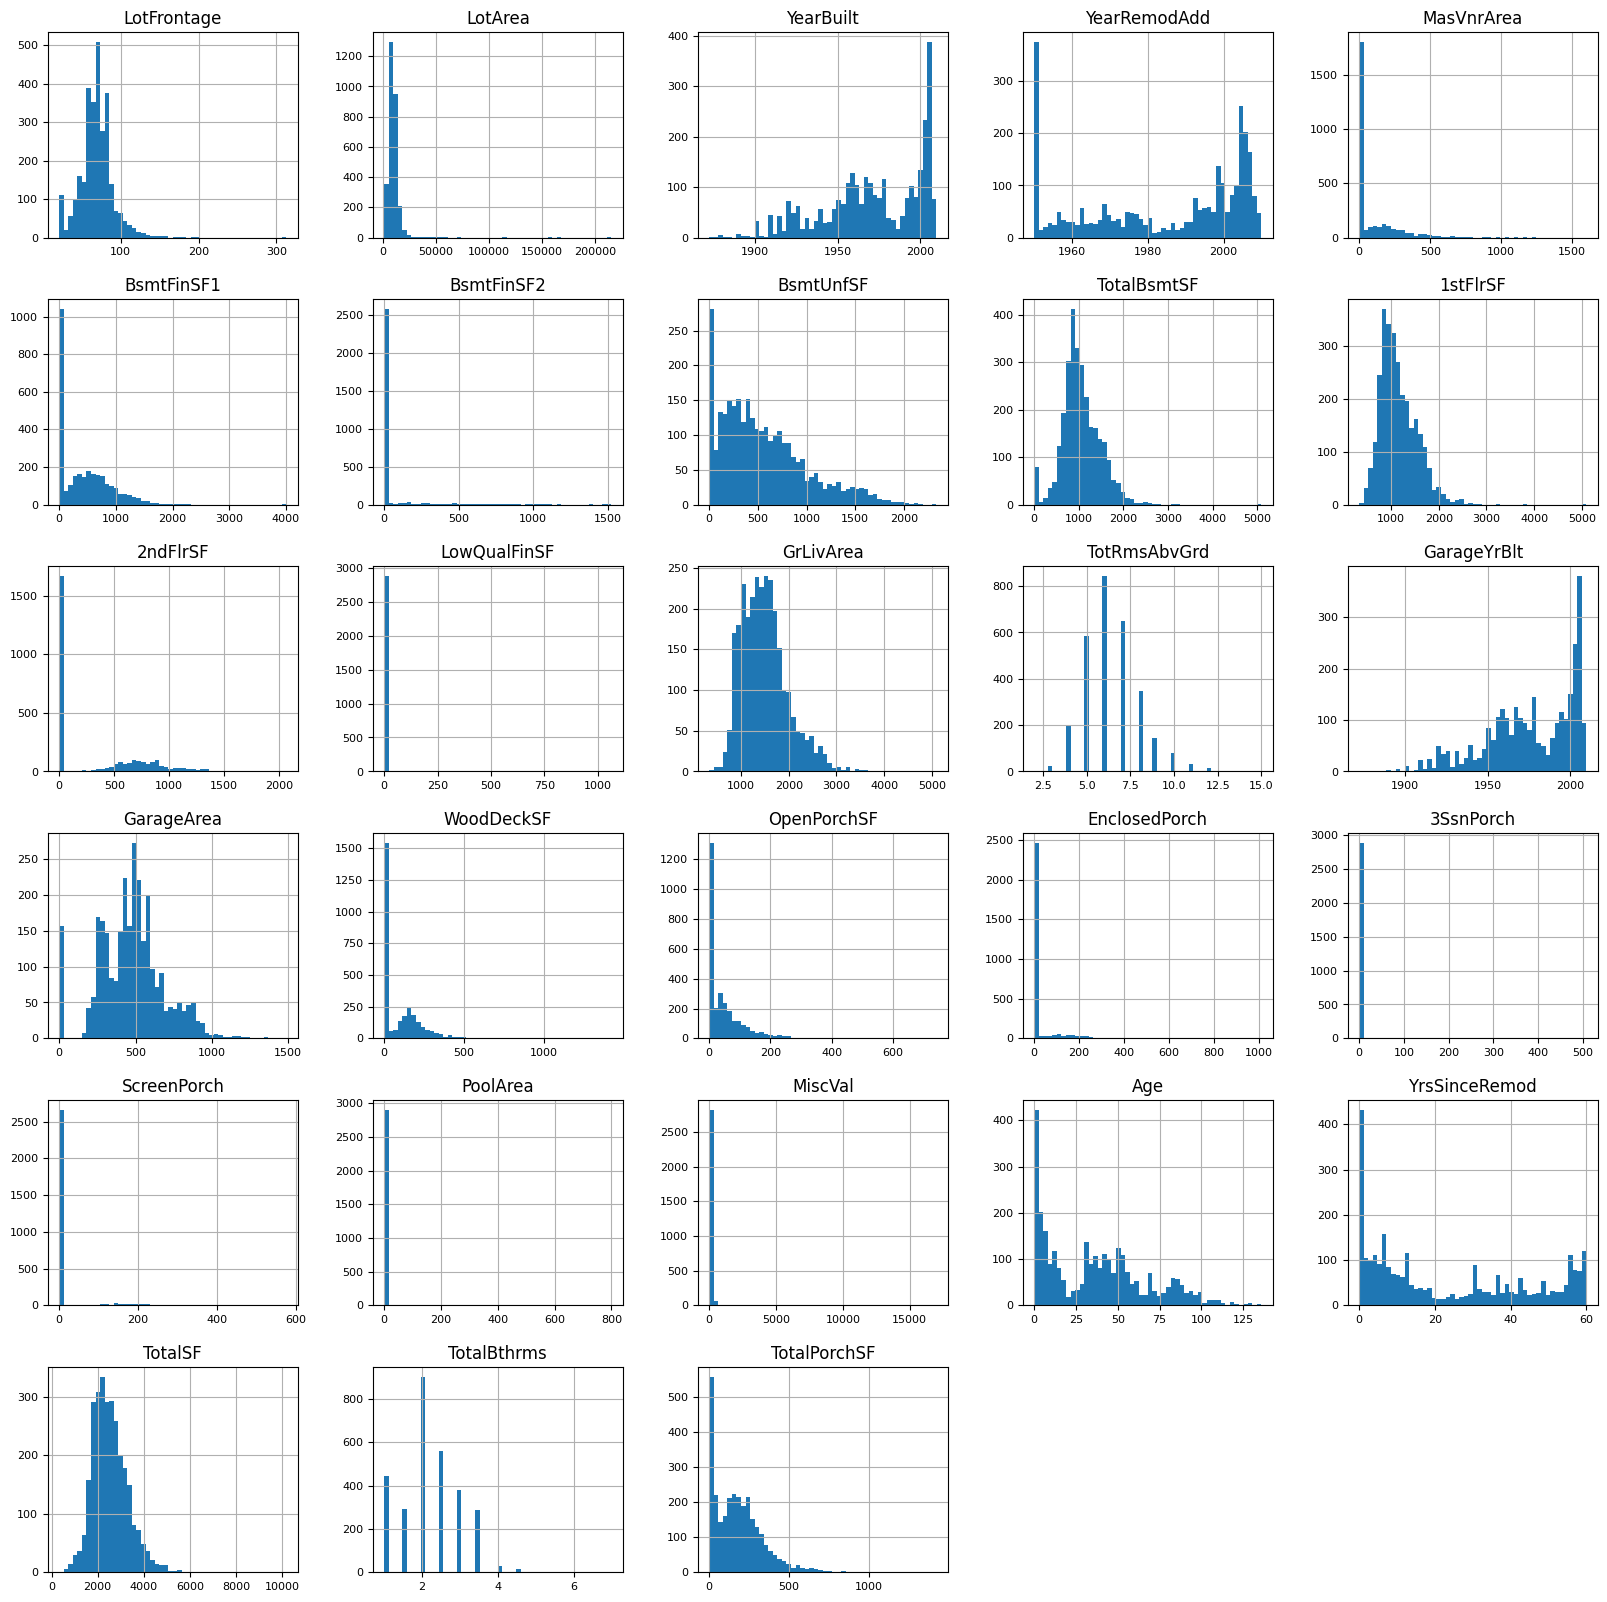

In [1311]:
# Plotting histograms of the above numeric features
df[trans_feats].hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

In [1312]:
# Transforming numerical features with a significant amount of skew using the boxcox transformation
transformed_cols = []
for col in trans_feats:
    if df[col].skew() > 0.5:
        transformed_cols.append(col)
        df[col] = ss2.boxcox1p(df[col], ss.boxcox_normmax(df[col]+1))

transformed_cols

c:\virtual_envs\mle06_training\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\virtual_envs\mle06_training\lib\site-packages\scipy\stats\_stats_py.py:4464: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'Age',
 'TotalSF',
 'TotalPorchSF']

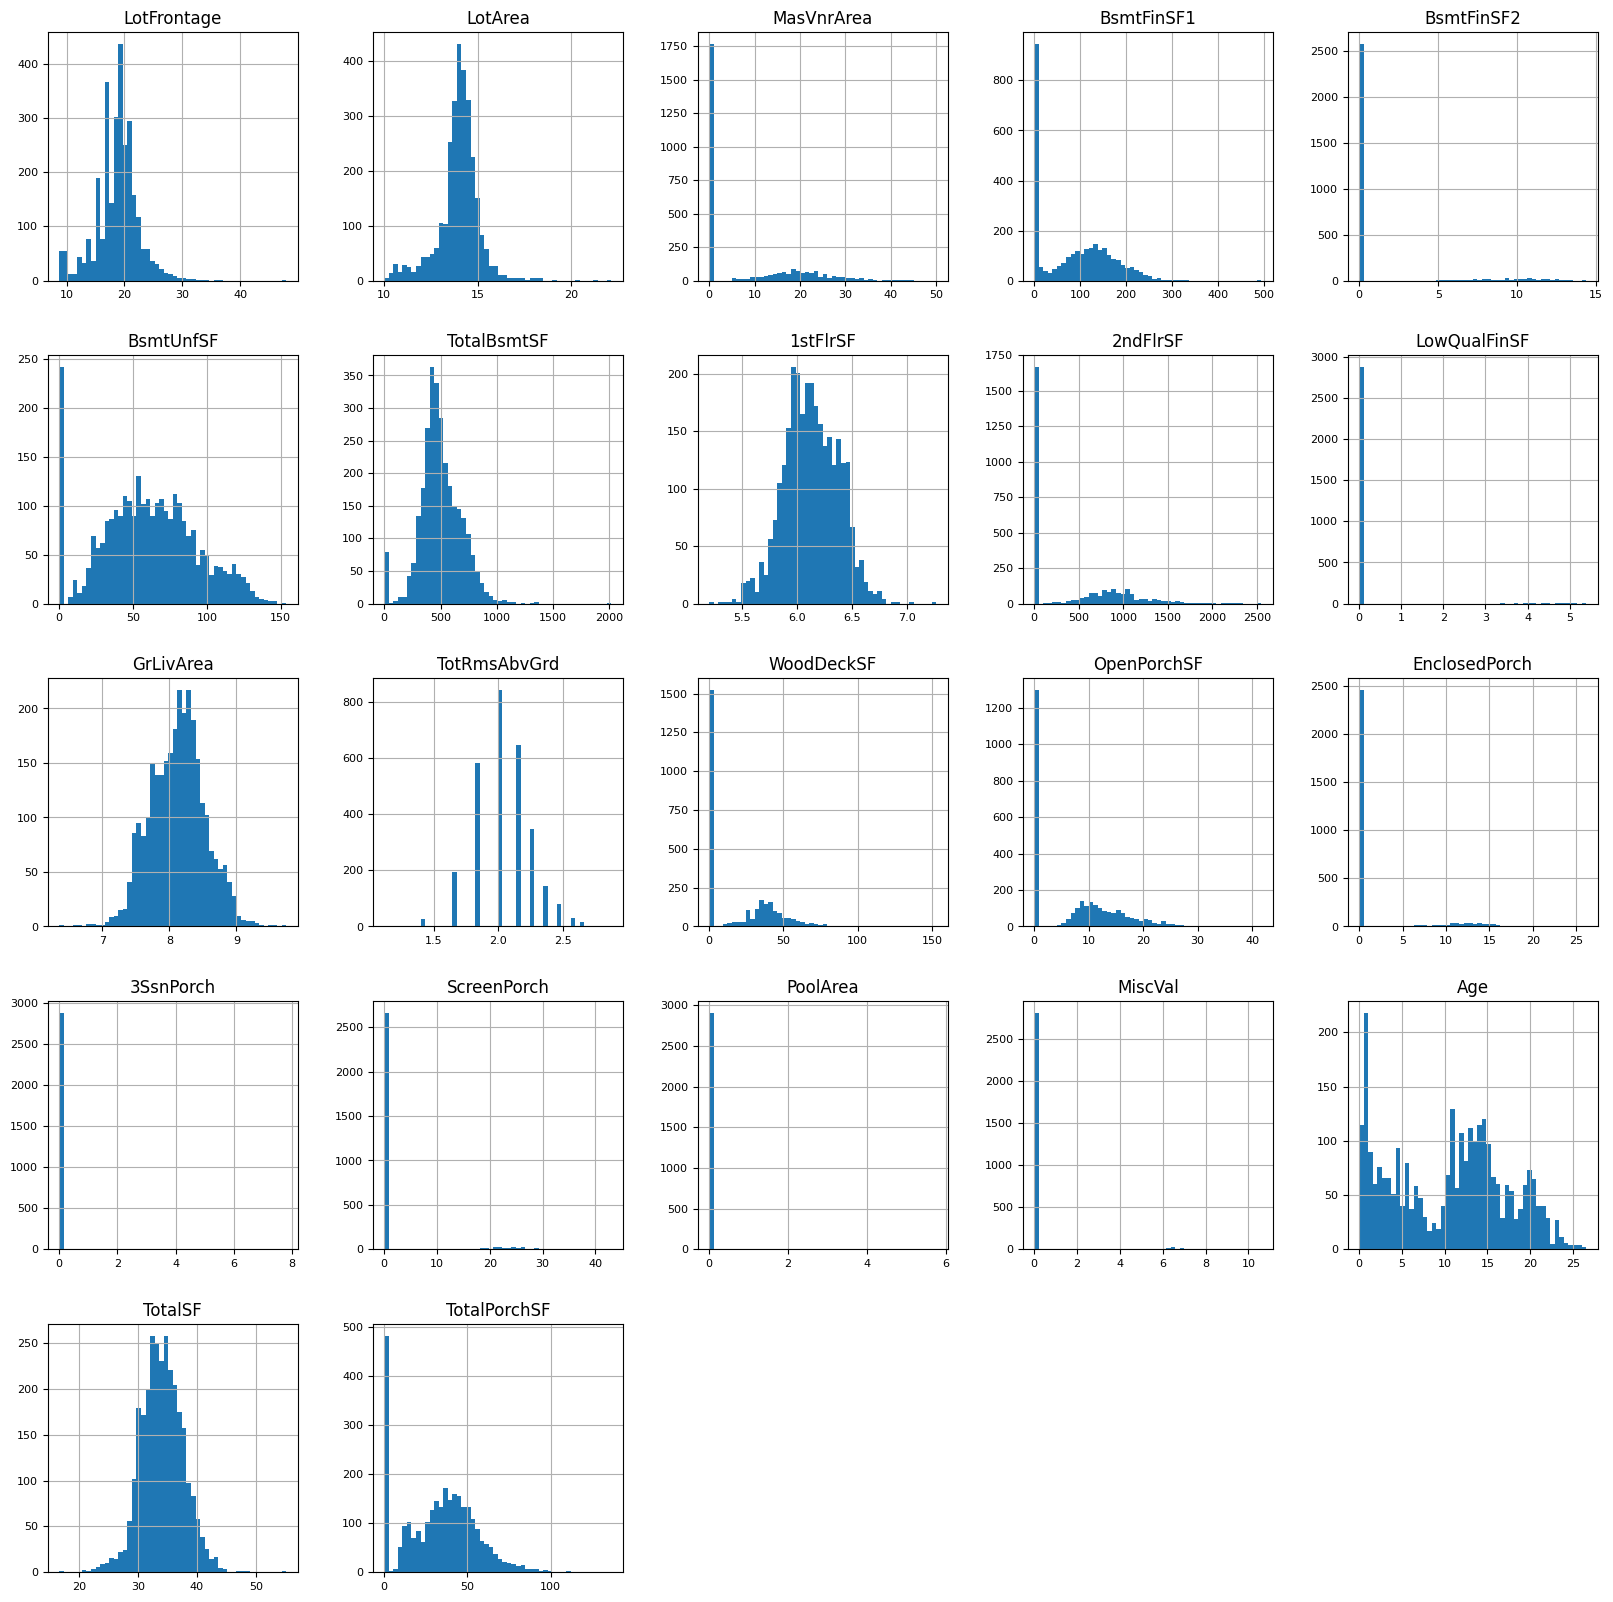

In [1313]:
# Plotting histograms of the above transformed features
df[transformed_cols].hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

Lets now look at the SalePrice target distribution and transform if necessary.

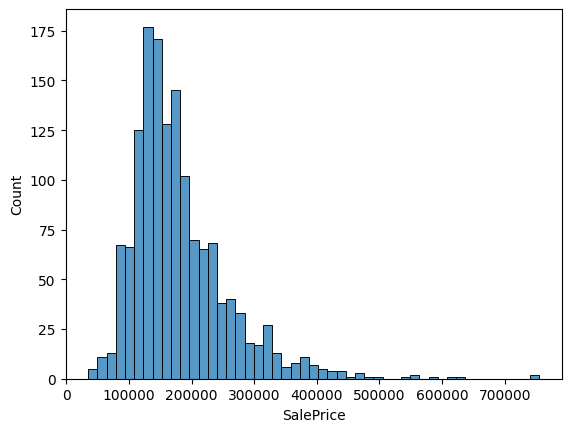

In [1314]:
# Visualising SalePrice distribution
sns.histplot(df, x='SalePrice');

Due to the right-skewed nature of the distribution we will perform a log-transform of the data to normalise it. When making predictions later on we will have to remember to take the exponential of the result to get the actual predicted SalePrice.

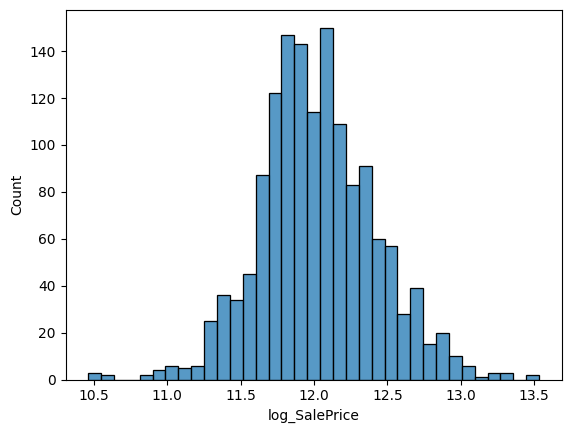

In [1315]:
log_salePrice = np.log(df['SalePrice'])
log_salePrice.name = 'log_SalePrice'
sns.histplot(log_salePrice);

In [1316]:
# Adding log_salePrice to the dataframe
df['log_SalePrice'] = log_salePrice

# Dropping the original SalePrice target
df.drop(columns='SalePrice', inplace=True)

Lets save a copy of the data in its current state (encoded and transformed) for evaluation in the initial model exploration stage.

In [1317]:
# Splitting the dataframe back into train and test sets
df_train = df.loc[0:train_len-1]
df_test = df.loc[train_len:].reset_index(drop=True)

# Saving the dataset in its current form (non-transformed or scaled numerics)
df_train.to_csv(r'../data/formatted_data/fe/train_fe_trnsfrmd.csv')
df_test.to_csv(r'../data/formatted_data/fe/test_fe_trnsfrmd.csv')

Lets now scale the numerical features and again save the datasets. We will produce two datasets with different scaling methods, one with normalisation and one with standardisation. We have to be concious here to scale based off the training data and then apply this scaling to the test data to avoid data leakage.

### Min-Max Scaling

In [1318]:
# Selecting any features with more than 2 values to be scaled
# adding Utilities manually as it has two values 
scale_feats = (df[num_feats].nunique()[df[num_feats].nunique() > 2].index).tolist()
scale_feats.append('Utilities')
print(scale_feats)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age', 'YrsSinceRemod', 'TotalSF', 'TotalBthrms', 'TotalPorchSF', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish', 'PavedDrive', 'Fence', 'Utilities']


In [1319]:
# Creating copy of dataset for normalization
df_norm = df.copy()
df_train = df.loc[0:train_len-1]
df_test = df.loc[train_len:].reset_index(drop=True)

# Normalizing numerical data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[scale_feats] = scaler.fit_transform(df_train[scale_feats])
df_test[scale_feats] = scaler.transform(df_test[scale_feats])

# Saving the dataset in its current form (transformed and normalised)
df_train.to_csv(r'../data/formatted_data/fe/train_fe_norm.csv')
df_test.to_csv(r'../data/formatted_data/fe/test_fe_norm.csv')

C:\Users\RyanHancox\AppData\Local\Temp\ipykernel_23212\3899236822.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[scale_feats] = scaler.fit_transform(df_train[scale_feats])


### Standardisation

In [1321]:
# Creating a copy of the transformed dataset for standardisation
df_norm = df.copy()
df_train = df.loc[0:train_len-1]
df_test = df.loc[train_len:].reset_index(drop=True)

# Standardising numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[scale_feats] = scaler.fit_transform(df_train[scale_feats])
df_test[scale_feats] = scaler.transform(df_test[scale_feats])

# Saving the dataset in its current form (transformed and standardised)
df_train.to_csv(r'../data/formatted_data/fe/train_fe_stand.csv')
df_test.to_csv(r'../data/formatted_data/fe/test_fe_stand.csv')

C:\Users\RyanHancox\AppData\Local\Temp\ipykernel_23212\1575832467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[scale_feats] = scaler.fit_transform(df_train[scale_feats])
